In [168]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
summary = pd.read_csv("atusdata/atussum_2013.dat")
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


In [4]:
summary.columns

Index(['tucaseid', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 
       ...
       't181501', 't181599', 't181601', 't181801', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=413)

Pertinent columns:

* TUFINLWGT - statistical weight of respondent
* TRYHHCHILD - age of youngest child in household (-1 means no children)
* TEAGE - age of respondent
* TESEX - sex of respondent
* TELFS - working status of respondent
* TRCHILDNUM - number of children in household

In [5]:
summary.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [69]:
adults_crit = summary.TEAGE >= 18
child_crit = summary.TEAGE < 18
no_children_crit = summary.TRCHILDNUM == 0
with_children_crit = summary.TRCHILDNUM > 0
men_crit = summary.TESEX == 1
women_crit = summary.TESEX == 2
married_crit = summary.TRSPPRES == 1
with_partner_crit = summary.TRSPPRES == 2
single_crit = summary.TRSPPRES == 3
millenials_crit_1 = summary.TEAGE <= 29
gen_x_crit_1 = summary.TEAGE > 29
gen_x_crit_2 = summary.TEAGE < 49
boomers_crit_1 = summary.TEAGE >= 49
boomers_crit_2 = summary.TEAGE <= 67

# Demographic Groups

In [70]:
adults = summary[adults_crit]
children = summary[child_crit]
people_no_children = summary[no_children_crit]
people_with_children = summary[with_children_crit]
men = summary[men_crit]
women = summary[women_crit]
men_no_children = summary[men_crit & no_children_crit]
men_with_children = summary[men_crit & with_children_crit]
women_no_children = summary[women_crit & no_children_crit]
women_with_children = summary[women_crit & with_children_crit]
married = summary[married_crit]
single = summary[single_crit]
live_with_partner = summary[with_partner_crit]
married_with_children = summary[married_crit & with_children_crit]
married_no_children = summary[married_crit & no_children_crit]
single_with_children = summary[single_crit & with_children_crit]
single_no_children = summary[single_crit & no_children_crit]
millenials = summary[adults_crit & millenials_crit_1]
gen_x = summary[gen_x_crit_1 & gen_x_crit_2]
boomers = summary[boomers_crit_1 & boomers_crit_2]

In [46]:
def activity_columns(data, activity_code):
    """For the activity code given, return all columns that fall under that activity."""
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

def average_minutes(data, activity_code):
    cols = activity_columns(data, activity_code)
    activity_data = data[cols]
    activity_sums = activity_data.sum(axis=1)
    data = data[['TUFINLWGT']]
    data['minutes'] = activity_sums
    data = data.rename(columns={"TUFINLWGT": "weight"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [162]:
average_minutes(women, '14')

/Users/abarringer/new_python/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


10.038484964938393

In [147]:
def activity_present(data, activity_code, minutes):
    cols = activity_columns(data, activity_code)
    data["sum"] = data[cols].sum(axis=1)
    activity_data = data[data["sum"] >= minutes]
    return activity_data.drop("sum", axis=1)

def no_activity(data, activity_code):
    cols = activity_columns(data, activity_code)
    data["sum"] = data[cols].sum(axis=1)
    activity_data = data[data["sum"] == 0]
    return activity_data.drop("sum", axis=1)

In [173]:
all_religion = average_minutes(summary, "14")
men_religion = average_minutes(men, "14")
women_religion = average_minutes(women, "14")

/Users/abarringer/new_python/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [166]:
religion_by_sex = pd.Series({"Men": men_religion, "Women": women_religion})

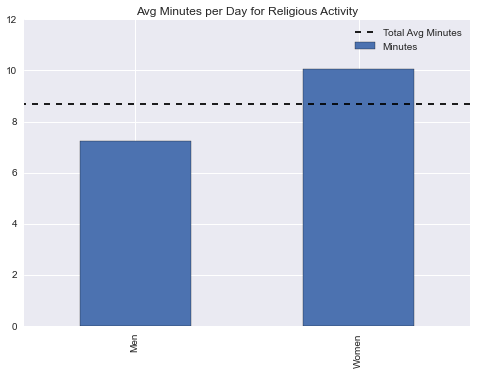

In [192]:
religion_by_sex.plot(kind="bar", label="Minutes", title="Avg Minutes per Day for Religious Activity")
plt.hlines(all_religion, xmin=-1, xmax=12, linestyle="dashed", label="Total Avg Minutes")
plt.legend()
plt.show()

In [182]:
millenials_religion = average_minutes(millenials, "14")
gen_x_religion = average_minutes(gen_x, "14")
boomers_religion = average_minutes(boomers, "14")

/Users/abarringer/new_python/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [183]:
religion_by_age = pd.Series({"Millenials": millenials_religion, "Gen X": gen_x_religion, "Boomers": boomers_religion})

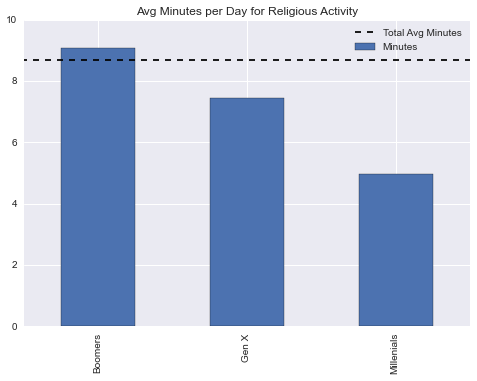

In [191]:
religion_by_age.plot(kind="bar", label="Minutes", title="Avg Minutes per Day for Religious Activity")
plt.hlines(all_religion, xmin=-1, xmax=12, linestyle="dashed", label="Total Avg Minutes")
plt.legend()
plt.show()

# Gender/Age Demographics

In [201]:
men_millenials = summary[men_crit & adults_crit & millenials_crit_1]
women_millenials = summary[women_crit & adults_crit & millenials_crit_1]
men_gen_x = summary[men_crit & gen_x_crit_1 & gen_x_crit_2]
women_gen_x = summary[women_crit & gen_x_crit_1 & gen_x_crit_2]
men_boomers = summary[men_crit & boomers_crit_1 & boomers_crit_2]
women_boomers = summary[women_crit & boomers_crit_1 & boomers_crit_2]

In [205]:
men_mill_religion = average_minutes(men_millenials, "14")
women_mill_religion = average_minutes(women_millenials, "14")
men_genx_religion = average_minutes(men_gen_x, "14")
women_genx_religion = average_minutes(women_gen_x, "14")
men_boomers_religion = average_minutes(men_boomers, "14")
women_boomers_religion = average_minutes(women_boomers, "14")

/Users/abarringer/new_python/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [213]:
mmrel = {"Gender": "Men", "Age Group": "Millenials", "Religious Activity": men_mill_religion}
wmrel = {"Gender": "Women", "Age Group": "Millenials", "Religious Activity": women_mill_religion}
mxrel = {"Gender": "Men", "Age Group": "Gen X", "Religious Activity": men_genx_religion}
wxrel = {"Gender": "Women", "Age Group": "Gen X", "Religious Activity": women_genx_religion}
mbrel = {"Gender": "Men", "Age Group": "Boomers", "Religious Activity": men_boomers_religion}
wbrel = {"Gender": "Women", "Age Group": "Boomers", "Religious Activity": women_boomers_religion}
religion_agemf = pd.DataFrame([mmrel, wmrel, mxrel, wxrel, mbrel, wbrel])

In [214]:
religion_agemf
religion_table = pd.pivot_table(religion_agemf, values="Religious Activity", index="Age Group", columns="Gender")

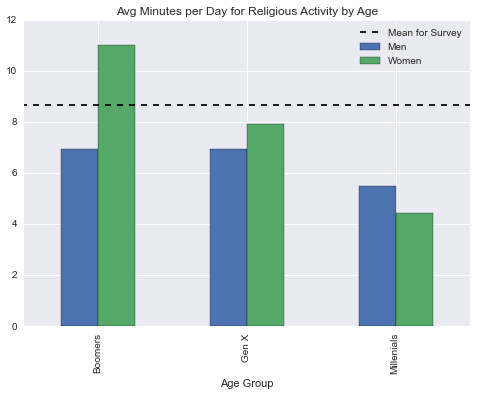

In [222]:
religion_table.plot(kind="bar", label="Minutes", title="Avg Minutes per Day for Religious Activity by Age")
plt.hlines(all_religion, xmin=-1, xmax=12, linestyle="dashed", label="Mean for Survey")
plt.legend()
plt.show()